In [ ]:
# konlpy 라이브러리 설치
!pip install konlpy


     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 3.8MB 21.3MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# 새 섹션

In [ ]:
# Matplotlib 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

!apt-get -qq -y install fonts-nanum > /dev/null

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


In [ ]:
# 파이썬프로그래밍활용 1급 실기과제-2 #

from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


# 키워드 검색 뉴스 가사 타이틀 가져오기 
def get_news_titles(start_num, end_num):  
    
    while True :
        if start_num > end_num:
            break
 
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}'.format(search_word, start_num)
    
        response = requests.get(url) 
        html = response.text
        soup = BeautifulSoup(html, "html.parser")
                   
        # 뉴스 타이틀 가져오기
        titles = soup.select('ul.type01 > li > dl > dt > a')
        
        # 뉴스 타이틀을 list에 저장
        for title in titles:
            title_list.append(title['title'])
            
        start_num += 10  # 읽어올 기사 수 조정 

    # 수집한 기사 타이틀 출력
    for no, title in enumerate(title_list, start=1) :
      print(no, title) 
    print("-"* 120)




NameError: ignored

In [ ]:
# 워드 클라우드 그리기
def make_wordcloud(wordcount):
    
    okt = Okt() 
    sentences_tag = []
    
    # 형태소로 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
 
    noun_adj_list = []
    # 형태소 중 명사와 형용사만 리스트에 넣기
    for sentence in sentences_tag:
        for word, tag in sentence:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    
    # 단어 빈도수 세기
    count = Counter(noun_adj_list)
      
    # 빈도수가 높은 단어 50개 추출, 글자 길이가 2이상인 단어만 추출
    wordInfo = dict()
    for tags, counts in count.most_common(wordcount):
        if len(wordInfo) >= 50 :   # 빈도수가 높은 단어 50개 추출
            break
        if (len(str(tags)) > 1):  # 글자 길이가 2이상인 단어만 추출
            wordInfo[tags] = counts
            print ("%s : %d" % (tags, counts))
      
    # wordcloud 객체 생성(한글깨지는 문제 해결하기위해 font_path 지정)
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    wc = WordCloud(font_path = font_path,
                              background_color='white', width=600, height=480)
    # wordcloud 객체에 데이터 매핑
    wc.generate_from_frequencies(wordInfo)

    # wordcloud 그리기
    plt.figure(figsize=(10, 6))
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
        
    # 워드 클라우드 그림 파일로 저장하기    
    wc.to_file('2007-00359-이승민-3.png')   # 수험번호와 이름을 입력해주세요.



1 올해 예비군훈련, 코로나에 하루 4시간으로 축소…52년만에 처음(종합)
2 GC녹십자, 코로나19 혈장치료제 임상 2상 신청
3 GC녹십자, 코로나19 혈장치료제 임상2상 신청
4 GC녹십자엠에스, '코로나 진단키트 수출 덕' 2분기 영업익 전년比 10배 증가
5 "땡큐, 신사업!" GS건설 코로나19에도 매출 성장세
6 코로나19 이후 5개월…대기업 직원 1만명 이상 줄었다
7 수퍼컴퓨터로 '코로나19 치료제' 설계했다
8 올해 예비군 훈련, 코로나에 하루 4시간으로 축소…9월부터 실시
9 올해 예비군 훈련, 코로나로 하루 4시간만…9월부터 재개
10 신종플루 무료접종 했는데 '코로나 백신' 가격은?
11 WHO "북한서 최근 1천200여명 코로나 검사, 약 700명 격리"
12 GC녹십자엠에스, '코로나 진단키트 수출 덕' 2분기 영업익 전년比 10배 증가
13 WHO "北 코로나 1,200여명 검사…확진자는 제로"
14 코로나 시대 소비 키워드 'DISTANCE'…'거리두기'
15 코로나 5개월…대기업 직원 1만2천명 줄었다
16 화웨이 수석부사장 "코로나19 대처하려면 공동으로 노력해야"
17 ‘코로나19’ 확진자 48명 추가…해외유입 34명, 지역발생 14명
18 코로나19 이후 5개월…대기업 직원 1만명 이상 줄었다
19 <10문10답>전세계 ‘코로나 백신 개발’ 현황·전망
20 수퍼컴퓨터로 '코로나19 치료제' 설계했다
21 WHO "코로나19 계절 타지 않는다"
22 미국만 39달러? 코로나 백신 화이자 모더나 가격은(종합)
23 검찰, '코로나 방역 방해' 신천지 이만희 구속영장 청구(종합)
24 SKT, 코로나19 방역 돕는 '누구 케어콜' 지원 확대
25 "손님 줄었다고 연차 쓰래요"…코로나19 확산 속 '휴가 갑질'
26 삼성SDI, 코로나 19에도 ‘기대 이상 성적’
27 코로나19가 생물학무기? 러시아, 미국대선 앞 괴담 유포 정황
28 "코로나19는 정신병" 벨라루스 대통령 황당 주장
29 코로나19 가짜뉴스 올렸다고…트럼프 장남

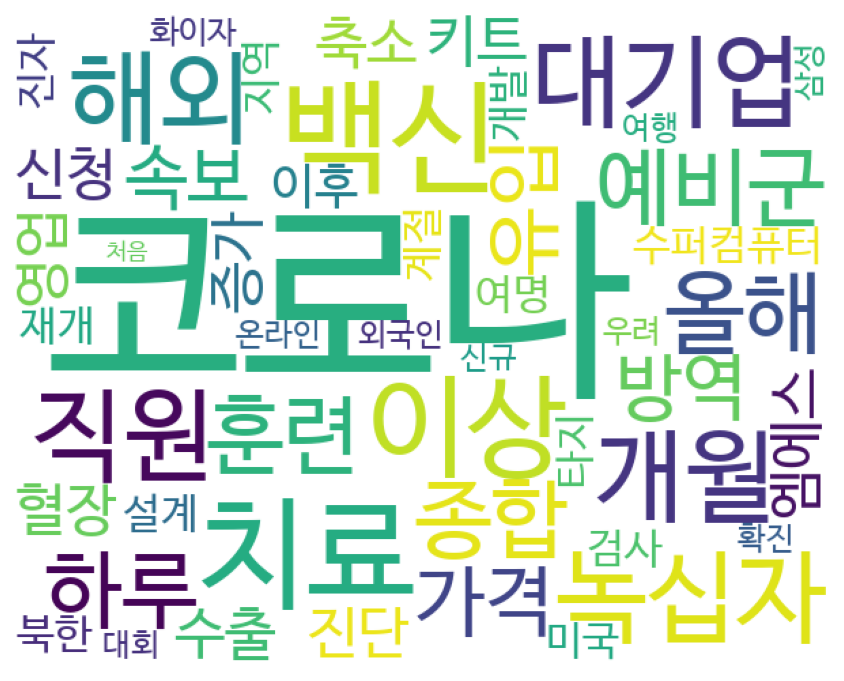

In [ ]:
# 메인 프로그램     
if __name__ == '__main__':
    
    search_word ='신종코로나' # 키워드 검색
    title_list = []

# 뉴스 기사 타이틀 크롤링(시작 ~ 끝)
get_news_titles(1, 50)
 
# 워드클라우드 그리기
make_wordcloud(100)


# 새 섹션